# 一、資料匯入

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
376,內湖區,18.80,79.97,179942,2,2,1,0.00,0,21,85,106,1439.0,0,0,0,1,0,0,0,0,0,0,0,0
633,南港區,53.42,340.30,206524,0,0,0,29.44,2300000,2,104,106,6650.0,0,0,0,0,0,1,0,0,0,0,0,0
608,文山區,35.60,189.73,191016,3,2,2,33.46,2150000,3,103,106,3200.0,0,0,0,0,0,0,0,0,0,1,0,0
420,北投區,42.16,281.81,110713,4,2,3,0.00,0,18,88,106,3120.0,0,0,0,0,1,0,0,0,0,0,0,0
316,北投區,19.41,102.63,170767,1,1,1,33.53,1700000,1,105,106,1350.0,0,0,0,0,1,0,0,0,0,0,0,0


# 二、建模前預處理

## 切分訓練及測試資料

In [298]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.head()

,建物移轉總面積平方公尺
84,48.79
471,73.87
587,187.44
4,242.78
141,82.12


## 標準化

In [299]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 產生高次方項

In [300]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std)
X_poly = quadratic.fit_transform(X_std)

## plot_learning_curve function

In [301]:
# Scikit-Learn 官網作圖函式
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print(train_sizes)
    return plt

Automatically created module for IPython interactive environment


# 三、KNNRegressor

In [302]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=10, weights='uniform')
knnr.fit(X_train_std, y_train)

print("MSE: %.2F" % np.mean((knnr.predict(X_test_std) - y_test)**2))
print("R Square:",knnr.score(X_test_std, y_test))

MSE: 976286.42
R Square: 0.776876912075471


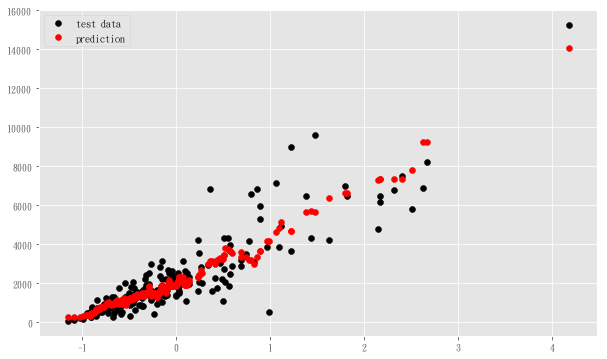

In [303]:
#測試資料及其預測結果
plt.figure(figsize=(10,6))
plt.scatter(X_test_std, y_test, c='k', label='test data')
plt.scatter(X_test_std, knnr.predict(X_test_std), c='red', label='prediction')
plt.legend()
plt.show()

In [304]:
print(X_test_std.shape)
print(X_test_std.max())
print(X_test_std.min())

(192, 1)
4.176160672745121
-1.155023288522388


## 校調k值

Max R Square: 0.7813713278951804
n_neighbors(Max score): 11


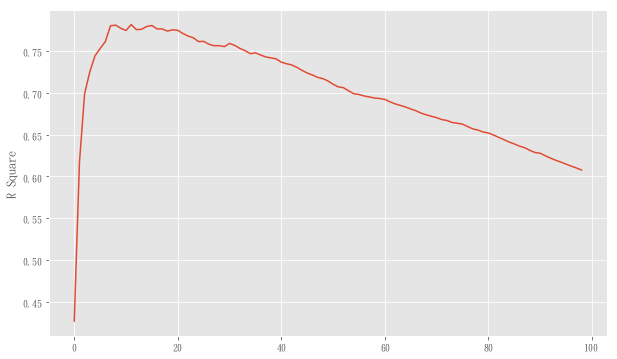

In [305]:
score_list=[]
for i in range(1,100):
    knnr = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    knnr.fit(X_train_std, y_train)
    score_list.append(knnr.score(X_test_std, y_test))
print("Max R Square:" , max(score_list))
print("n_neighbors(Max score):" , score_list.index(max(score_list)))
plt.figure(figsize=(10,6))
plt.ylabel('R Square')
plt.plot(score_list)

## plot_learning_curve

[115 230 345 460 576]


<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

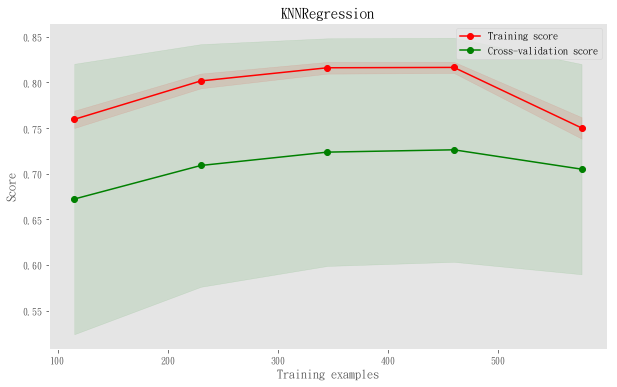

In [306]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KNeighborsRegressor(n_neighbors=10, weights='uniform')

plot_learning_curve(estimator, "KNNRegression", X_std, y, cv=cv, 
                    train_sizes=np.linspace(0.2, 1.0, 5))

# 超參數調校
## 網格搜尋(Grid Search)

In [311]:
# 網格搜尋(Gird Search)
from sklearn.model_selection import GridSearchCV

#超參數範圍設定
n_neighbors = [i for i in range(1,50, 1)]
weights = ['uniform', 'distance']
hyperpatameters = dict(n_neighbors=n_neighbors, weights=weights)

#模型載入及訓練
model = KNeighborsRegressor()
knn = GridSearchCV(model, hyperpatameters, cv=5, verbose=0) #cv可搭配k-fold

best_model = knn.fit(X_train_std, y_train)

#查看最好的參數
print('best_params:', best_model.best_params_)
print('所有的參數:', best_model.best_estimator_.get_params())
print("MSE: %.2F" % np.mean((best_model.predict(X_test_std) - y_test)**2))
print('R Square:',best_model.score(X_test_std, y_test))

best_params: {'n_neighbors': 49, 'weights': 'distance'}
所有的參數: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 49, 'p': 2, 'weights': 'distance'}
MSE: 1273412.03
R Square: 0.7089710359283926


## 隨機搜尋

In [313]:
from sklearn.model_selection import RandomizedSearchCV

#超參數範圍設定
n_neighbors = [i for i in range(1,50, 1)]
weights = ['uniform', 'distance']

#模型載入及訓練
model = KNeighborsRegressor()
knn = RandomizedSearchCV(model, hyperpatameters, cv=5, iid=False)

best_model = knn.fit(X_train_std, y_train)

#查看最好的參數
print('best_params:', best_model.best_params_)
print('所有的參數:', best_model.best_estimator_.get_params())
print("MSE: %.2F" % np.mean((best_model.predict(X_test_std) - y_test)**2))
print('R Square:',best_model.score(X_test_std, y_test))

best_params: {'weights': 'distance', 'n_neighbors': 36}
所有的參數: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 36, 'p': 2, 'weights': 'distance'}
MSE: 1293552.15
R Square: 0.704368160791756
